<a href="https://colab.research.google.com/github/ozeiasgodoy/notebooks/blob/main/MNIST_Iniciantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST é conjunto de dados, composto por pequenas imagens de digitos escritos a mão, por estudantes do ensino médio e o funcionarios do US Census **Bureuau**

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
#Importa o conjunto de dados
mnist = fetch_openml('mnist_784')

In [4]:
#Divindo o conjunto de dados
#X = Pixels da imagem
#y = Label(Representação numerica: 0,1,2,3,4,5,6,7,8,9)
X, y = mnist["data"], mnist["target"]

In [5]:
#Existem 70 mil imagens e cada uma possui 784 caracteristicas(28 px * 28 px) e cada caracteristca representa a intesidade
# de um pixel 0(branco) a 255(preto)
X.shape

(70000, 784)

In [6]:
#Visualizando a estrutura do dataframe
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Visualizando a formato do label
y.shape

(70000,)

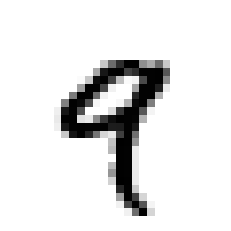

In [8]:
#Analisando um unico digito

import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[[4]].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap= matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [9]:
#Verificando o label na posição do digito plotando acima
y[4]


'9'

In [10]:
#Dividindo o dados em conjunto de treino e teste
#60000 para treino e 10000 para teste

X_train, X_teste, y_train, y_test = X[:60000].to_numpy(), X[60000:].to_numpy(), y[:60000].to_numpy(), y[60000:].to_numpy()

In [11]:
#Embaralhando os dados
#Não fazer isso em series temporais!!!!
import numpy as np

suffle_index = np.random.permutation(60000)
X_train, y_train = X_train[suffle_index], y_train[suffle_index]

In [12]:
#Criando um classificador Binario(É ou não É determinado valor - no nosso caso 9)

y_train_9 = (y_train == '9') #Verdadeiro para 9 e falso para os demais numeros
y_test_9 = (y_test == '9') #Verdadeiro para 9 e falso para os demais numeros

#Verificando se existe somente dois tipos de valores(False e True)
np.unique(y_train_9)

array([False,  True])

In [13]:
#Treinando o modelo
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(random_state=42)

In [14]:
#Prevendo se o numero que separamos no inicio é classificado como 9
sgd_clf.predict(some_digit)

array([ True])

# Avaliando o desempenho com validação cruzada "manual"

Validação cruzada:
Consiste em dividir o conjunto de treinamento em K-folds(nesse caso 4), prever e avaliar as previsões em cada conjunto utilizando um modelo treinado em conjuntos restantes

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [16]:
#StratifiedKFold: Divide o conjunto de dados em grupos estatificados, para produzir conjuntos de dados  com proporções representativas de cada classe
skfolds = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

In [17]:
for train_index, test_index in skfolds.split(X_train, y_train_9):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_9[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_9[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)

  print(n_correct / len(y_pred))


0.9507333333333333
0.9202666666666667
0.9201333333333334
0.948


# Avaliando o desempenho com validação cruzada utilizando o Sklearn
#e comparando modelos

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

#modelos  = [SGDClassifier(random_state=42),   KNeighborsClassifier(), RandomForestRegressor(n_estimators=50, random_state=42)]
modelos  = [SGDClassifier(random_state=42),   KNeighborsClassifier()]

mean=[]
std=[]
predict =[]

for modelo in modelos:
  print(modelo)
  result = cross_val_score(modelo, X_train, y_train_9, cv=3, scoring="accuracy", n_jobs=-1)
  mean.append(result)
  std.append(result)
  predict.append(cross_val_predict(modelo, X_train, y_train_9, cv=2))


SGDClassifier(random_state=42)
KNeighborsClassifier()


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


([], <a list of 0 Text major ticklabel objects>)

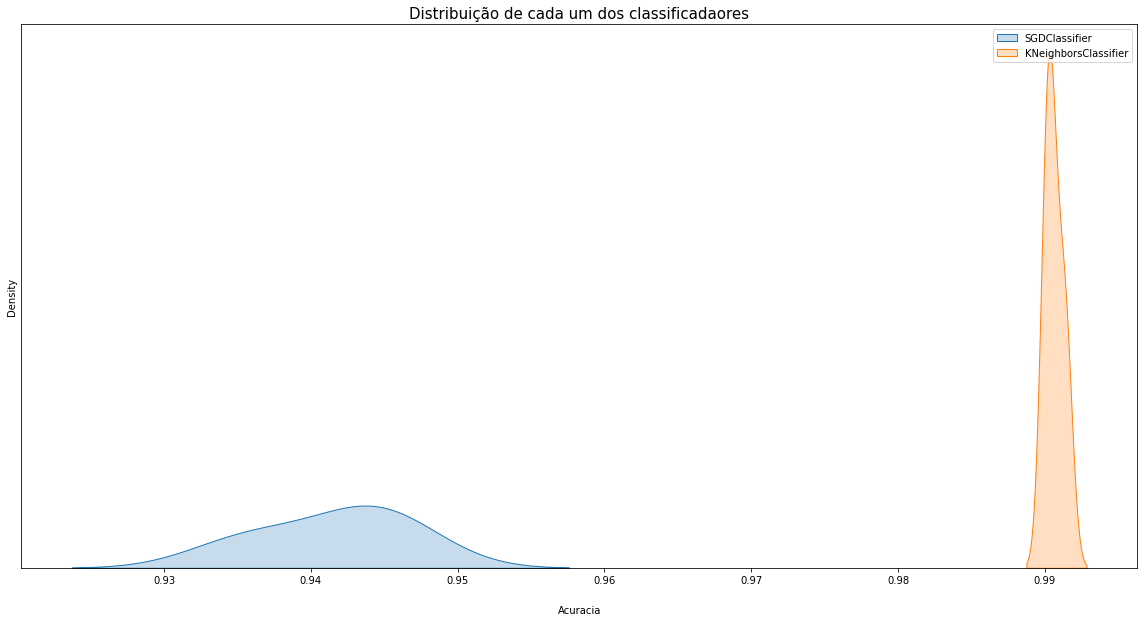

In [19]:
#Plotando o desvio padrão dos modelos
import matplotlib.pyplot as plt
import seaborn as sns

#Quando usado mais de dois algoritmos, o processo fica muito lento ou até mesmo estouro a memoria na conta "free"
#Caso queria experimetar novos modelos é fazer a substituições

#classificadores = ['SGDClassifier', 'KNeighborsClassifier', 'RandomForestRegressor']
classificadores = ['SGDClassifier', 'KNeighborsClassifier']


plt.figure(figsize=(20, 10))
for i in range(len(mean)):
  sns.distplot(mean[i], hist=False, kde_kws={"shade":True})

plt.title("Distribuição de cada um dos classificadaores", fontsize=15)
plt.legend(classificadores)
plt.xlabel("Acuracia", labelpad=20)
plt.yticks([])

# Avaliando o modelo com uma matriz de confusão

In [20]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train_9, cv=2)


In [21]:
#Printando os valores da matrix de confusão
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train_9, y_train_pred_sgd))

[[53042  1009]
 [ 2947  3002]]


In [22]:
#Formato do array printado acima
#Classe Negativa[[Verdadeiros Negativos, Falsos Positivos]
#Classe positiva[Falsos Negativo, Verdadeiros Positivos]]

In [40]:
#Vamo plotar a matrix de confusão em percetuais para ficar mais didatico
from sklearn.metrics import confusion_matrix

cm = []
for pred in predict:
  aux = confusion_matrix(y_train_9, pred)
  cm.append(aux.astype('float') / aux.sum(axis=1)[:, np.newaxis])

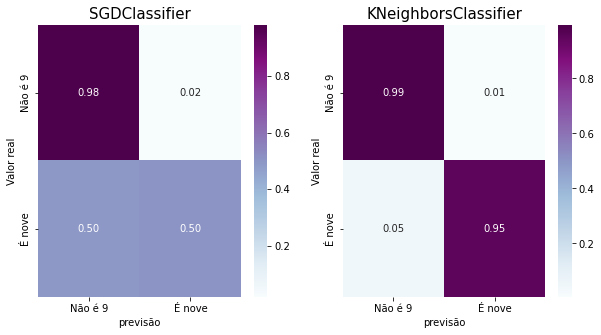

In [39]:

import pandas as pd

classes=["Não é 9", "É nove"]
f, ax = plt.subplots(1, 2,  figsize=(10, 5))
i = 0

for item in cm:
  ax[i].set_title(classificadores[i], fontsize=15.)
  sns.heatmap(pd.DataFrame(item, index=classes, columns=classes),
              cmap="BuPu", annot=True, fmt='.2f', ax=ax[i]).set(xlabel="previsão", ylabel="Valor real")
  i = i + 1

# Criando um classificador Multilabel
Até aqui trabalhamos apenas com classificador Singlelabel, passamos um imagem ao nosso modelo e ele nos disse se a imagem era um número nove ou não. Vamos 
cria um novo classificador e ele nos dirá se a imagem é de um numero maior que cinco e se esse numero é par ou impar.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

y_train_maior_5 = (y_train.astype(int) > 5) 
y_train_par = (y_train.astype(int) % 2 == 0)
y_multilabel = np.c_[y_train_maior_5, y_train_par]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [26]:
#Nosso digito para
some_digit = X.iloc[[13]].to_numpy()
y[13]

'6'

In [27]:
#Previsão do modelo
knn_clf.predict(some_digit)

array([[ True,  True]])

# Criando um classificador Multioutput
Finalizando vamos criar um classificador Multiclasse, no nosso caso ele irá prever pixel a pixel da imagem.

Criaremos uma imagem com ruido e depois nosso calssificardor irá limpar o ruido, mostrando a imagem nitida(Ou quase isso).




In [46]:
#Adicionando ruidos a nossa imagem
ruido = np.random.randint(0, 100, (len(X_train), 784))

X_train_mod = X_train + ruido

ruido = np.random.randint(0, 100, (len(X_teste), 784))

X_test_mod = X_teste + ruido

y_train_mod = X_train
y_test_mod = X_teste

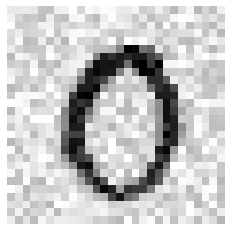

In [54]:
#Nossa imagem com ruido
some_digit = X_test_mod[[13]]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap= matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [55]:
#Treinando o modelo
knn_clf.fit(X_train_mod, y_train_mod)

#prevendo os pixels da nossa imagem
clean_digit = knn_clf.predict([X_test_mod[13]])


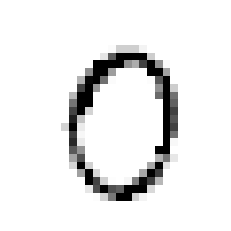

In [56]:
#Plotando a imagem sem ruido
clean_digit_image = clean_digit.reshape(28, 28)

plt.imshow(clean_digit_image, cmap= matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()